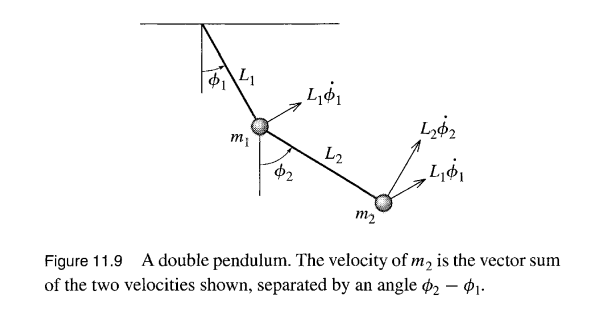

The following is the for final
Total potential energy of system

$\begin{align}
   U(\phi1,\phi2)=(m_1+m_2)gL_1(1-\cos\phi_1)+m_2gL_2(1-\cos(\phi_2))
  \;.
\end{align}$

total kinetic energy of the system

$\begin{align}
T(\phi_1,\phi_2)=1/2(m_1+m_2)L_1^2 \dot\phi_1^2 + m_2L_1L_2\dot\phi_1\dot\phi_2\cos(\phi_1-\phi) + 1/2 m_2 L_2^2\dot\phi_1^2
\;.
\end{align}$

The Lagrangian Explression

$\begin{align}
  \mathcal{L} = T - U = 1/2(m_1+m_2)L_1^2 \dot\phi_1^2 + m_2L_1L_2\dot\phi_1\dot\phi_2\cos(\phi_1-\phi) + 1/2 m_2 L_2^2\dot\phi_1^2 - (m_1+m_2)gL_1(1-\cos\phi_1) - m_2gL_2(1-\cos(\phi_2))
\end{align}$

The Euler-Lagrange equations:

$\begin{align}
   \frac{d}{dt} \frac{\partial\mathcal{L}}{\partial \dot\phi_1}=\frac{\partial\mathcal{L}}{\partial \phi_1}\
   \rightarrow \
   m_2 L_1 L_2 (\ddot\phi_2 \cos (\phi1 -\phi2) + \dot\phi_2 ^2 \sin (\phi1 -\phi2)) + (m_1 + m_2) L_1^2 \ddot\phi_1 \
   = -(m_1 + m_2) g L_1 \sin (\phi1)
   \;.
\end{align}$

$\begin{align}
   \frac{d}{dt} \frac{\partial\mathcal{L}}{\partial \dot\phi_2}=\frac{\partial\mathcal{L}}{\partial \phi_2}\
   \rightarrow \
   m_2 L_1 L_2 (\ddot\phi_2 \cos (\phi1 -\phi2) + \dot\phi_1 ^2 \sin (\phi1 -\phi2)) + m_2 L_1^2 \ddot\phi_2 \
       = -m_2 g L_2 \sin(\phi_2)
   \;.
\end{align}$

after some mathmatical manipulation:

$\begin{align}
   \ddot\phi1 = \frac{m_2 g \sin (\phi_2) \cos (\phi_1 - \phi_2) - m_2 \sin (\phi_1 - \phi_2)(L_1 \cos (\phi_1 - 
   \phi_2) \dot\phi_1^2 + L_2 \dot\phi_2^2) - (m_1 + m_2) g \sin (\phi_1)}
   {L1 (m_1 + m_2 \sin (\phi_1 - \phi_2)^2}
   \;.
\end{align}$

$\begin{align}
   \ddot\phi2 = \frac{(m_1 + m_2) (L_1 \dot\phi_1^2 ) \
    \sin (\phi_1 - \phi_2) - g \sin(\phi_2) + g \sin(\phi_1) \cos (\phi1 - \phi2)) + m_2 L_2 \dot\phi_2 ^2 \cos(\phi_1 - \phi_2) \sin (\phi1 - \phi2) }
    {L1 (m_1 + m_2 \sin (\phi_1 - \phi_2)^2}
   \;.
\end{align}$

I use theta as phi in the following expression.

In [1]:
%matplotlib inline

import numpy as np
from scipy.integrate import solve_ivp

import matplotlib.pyplot as plt
from IPython.display import Image

In [2]:
# The dpi (dots-per-inch) setting will affect the resolution and how large
#  the plots appear on screen and printed.  So you may want/need to adjust 
#  the figsize when creating the figure.
plt.rcParams['figure.dpi'] = 100.    # this is the default for notebook

# Change the common font size (smaller when higher dpi)
font_size = 12
plt.rcParams.update({'font.size': font_size})

In [3]:
#fix the following class accordingly
#1. assuming the pole has no mass
#2. two poles are in equal length

class DoublePendulum():
    """
    Pendulum class implements the parameters and Lagrange's equations for 
     a simple pendulum (no driving or damping).
     
    Parameters
    ----------
    L1 : float
        length of the simple pendulum1
    L2:  float(tbd)
        length of the simple pendulum1
        
    g : float
        gravitational acceleration at the earth's surface
    omega1_0 : float
        natural frequency of the pendulum (\sqrt{g/l} where l is the 
        pendulum length) 
    omega2_0:float(tbd)
        let it be zero
    mass1 : float
        mass of pendulum1
    mass2 : float(tbd)
        mass of pendulum2

    Methods
    -------
    dy_dt(t, y)
        Returns the right side of the differential equation in vector y, 
        given time t and the corresponding value of y.
    """
    def __init__(self, L1=1.,L2=1., mass1=1.,mass2=1., g=1.
                ):
        self.L1 = L1
        self.L2 = L2
        self.g = g
        self.m1 = mass1
        self.m2 = mass2
    
    def dy_dt(self, t, y):
        """
        This function returns the right-hand side of the diffeq: 
        [dphi/dt d^2phi/dt^2]
        
        Parameters
        ----------
        t : float
            time 
        y : float
            #A 2-component vector with y[0] = theta1(t) and y[1] = dtheta1/dt=z1
             y[2] = theta2(t) and y[3] = dtheta2/dt=z2
            
        Returns
        -------
        
        """
        theta1, z1, theta2, z2 = y
        
        c, s = np.cos(theta1 - theta2), np.sin(theta1 - theta2)
        denom = (self.m1 + self.m2 * s**2)
        
        theta1_dot = z1
        z1_dot = (self.m2 * self.g * np.sin(theta2) * c \
                 - self.m2 * s *(self.L1 * z1 ** 2 * c + self.L2 * z2**2) \
                 - (self.m1 + self.m2) * self.g * np.sin(theta1)) \
                 / self.L1 / denom
        
        theta2_dot = z2
        
        z2_dot = (( self.m1 + self.m2) * (self.L1 * z1**2 *s \
                - self.g * np.sin(theta2) + self.g * np.sin(theta1)* c) \
                + self.m2 *self.L2 * z2**2 * s * c) \
                / self.L2 / denom
        
        
        return theta1_dot, z1_dot, theta2_dot, z2_dot
        

    
    def solve_ode(self, t_pts, theta1_0, theta1_dot_0, theta2_0,theta2_dot_0, 
                  abserr=1.0e-10, relerr=1.0e-10):
        """
        Solve the ODE given initial conditions.
        Specify smaller abserr and relerr to get more precision.
        """
        y = [theta1_0, theta1_dot_0, theta2_0, theta2_dot_0]
        solution = solve_ivp(self.dy_dt,(t_pts[0], t_pts[-1]),
                             y,t_eval=t_pts,
                             atol=abserr, rtol=relerr)
        #print(solution)
        theta1, theta1_dot, theta2, theta2_dot = solution.y
        
        return theta1, theta1_dot, theta2, theta2_dot

    
    def calc_E(y):
        th1, th1d, th2, th2d = y.T
        V = -(m1+m2)*L1*g*np.cos(th1) - m2*L2*g*np.cos(th2)
        T = 0.5*m1*(L1*th1d)**2 + 0.5*m2*((L1*th1d)**2 + (L2*th2d)**2 + 2*L1*L2*th1d*th2d*np.cos(th1-th2))
        return T+V

In [4]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [5]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

In [6]:
# Labels for individual plot axes

theta_vs_time_labels = (r'$t$', r'$\theta(t)$')


# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 50.
delta_t = 0.01

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

L1 = 1.
L2 = 1.
g = 1.
mass1 = 1.
mass2 = 1.

# Instantiate a pendulum 
dp1 = DoublePendulum(L1=L1,L2=L2,mass1 = mass1,  mass2=mass2, g=g)

In [7]:
theta1_0 = np.pi/2.
theta1_dot_0 = 0.
theta2_0 = np.pi/3
theta2_dot_0 = 0.

theta1, theta_dot, theta2, theta2_dot = \
    dp1.solve_ode(t_pts,theta1_0,theta1_dot_0,theta2_0,theta2_dot_0)



In [8]:
#debug
len(theta2)

5001

In [9]:
len(t_pts)

5001

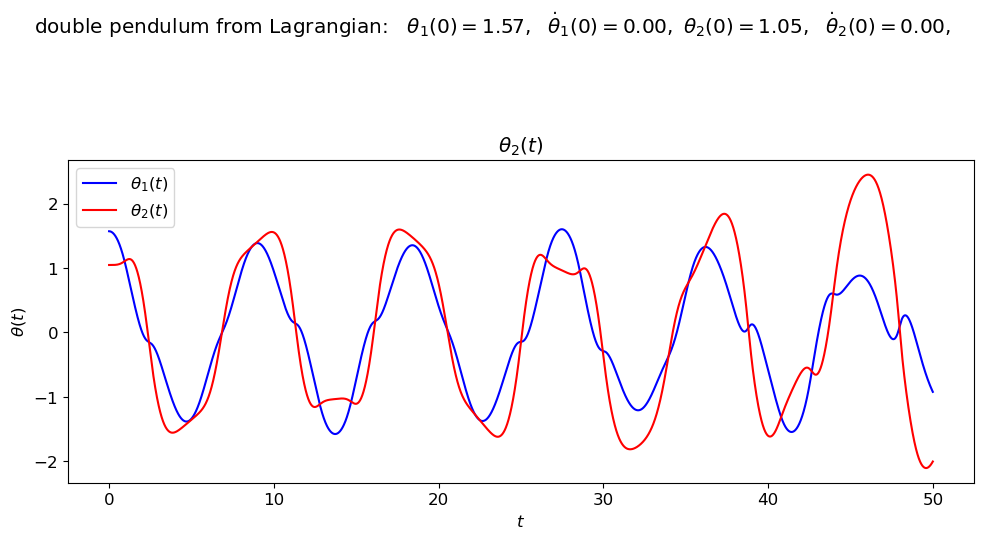

In [10]:
#start the plot
fig = plt.figure(figsize=(10,5))
overall_title = 'double pendulum from Lagrangian:  ' + \
                rf' $\theta_1(0) = {theta1_0:.2f},$' + \
                rf'  $\dot\theta_1(0) = {theta1_dot_0:.2f},$' + \
                rf' $\theta_2(0) = {theta2_0:.2f},$' + \
                rf'  $\dot\theta_2(0) = {theta2_dot_0:.2f},$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')

# first plot: phi plot 
ax_a = fig.add_subplot(1,1,1)
start, stop = start_stop_indices(t_pts,t_start,t_end)
plot_y_vs_x(t_pts[start : stop], theta1[start : stop], 
            axis_labels=theta_vs_time_labels, 
            color='blue',
            label=r'$\theta_1(t)$', 
            title=r'$\theta_1(t)$', 
            ax=ax_a) 
plot_y_vs_x(t_pts[start : stop], theta2[start : stop], 
            axis_labels=theta_vs_time_labels, 
            color='red',
            label=r'$\theta_2(t)$', 
            title=r'$\theta_2(t)$', 
            ax=ax_a)
fig.tight_layout()
fig.savefig('double_pendulum_Lagrange.png', bbox_inches='tight')

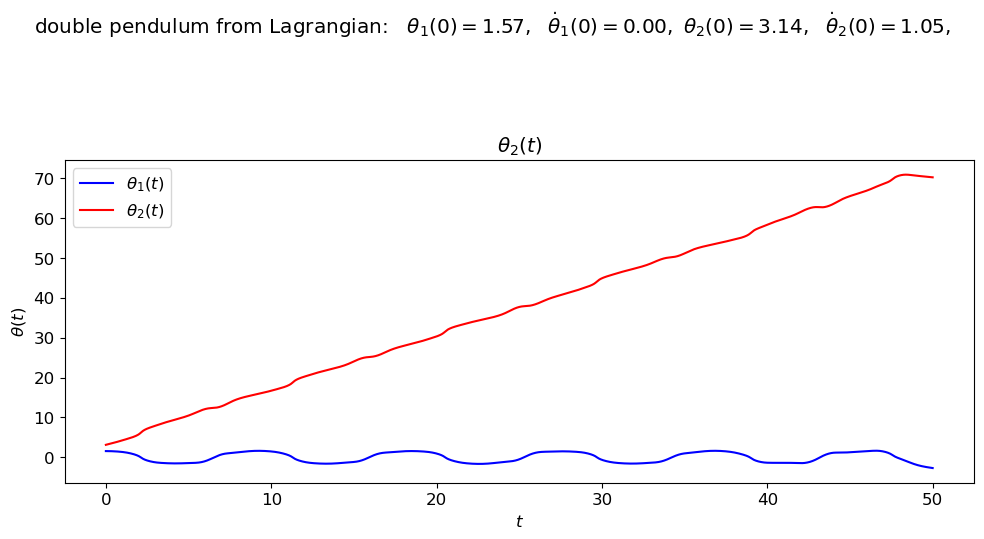

In [11]:
theta1_0 = np.pi/2.
theta1_dot_0 = 0.
theta2_0 = np.pi
theta2_dot_0 = np.pi / 3.

theta1, theta_dot, theta2, theta2_dot = \
    dp1.solve_ode(t_pts,theta1_0,theta1_dot_0,theta2_0,theta2_dot_0)
#start the plot
fig = plt.figure(figsize=(10,5))
overall_title = 'double pendulum from Lagrangian:  ' + \
                rf' $\theta_1(0) = {theta1_0:.2f},$' + \
                rf'  $\dot\theta_1(0) = {theta1_dot_0:.2f},$' + \
                rf' $\theta_2(0) = {theta2_0:.2f},$' + \
                rf'  $\dot\theta_2(0) = {theta2_dot_0:.2f},$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')

# first plot: phi plot 
ax_a = fig.add_subplot(1,1,1)
start, stop = start_stop_indices(t_pts,t_start,t_end)
plot_y_vs_x(t_pts[start : stop], theta1[start : stop], 
            axis_labels=theta_vs_time_labels, 
            color='blue',
            label=r'$\theta_1(t)$', 
            title=r'$\theta_1(t)$', 
            ax=ax_a) 
plot_y_vs_x(t_pts[start : stop], theta2[start : stop], 
            axis_labels=theta_vs_time_labels, 
            color='red',
            label=r'$\theta_2(t)$', 
            title=r'$\theta_2(t)$', 
            ax=ax_a)
fig.tight_layout()
fig.savefig('double_pendulum_Lagrange.png', bbox_inches='tight')

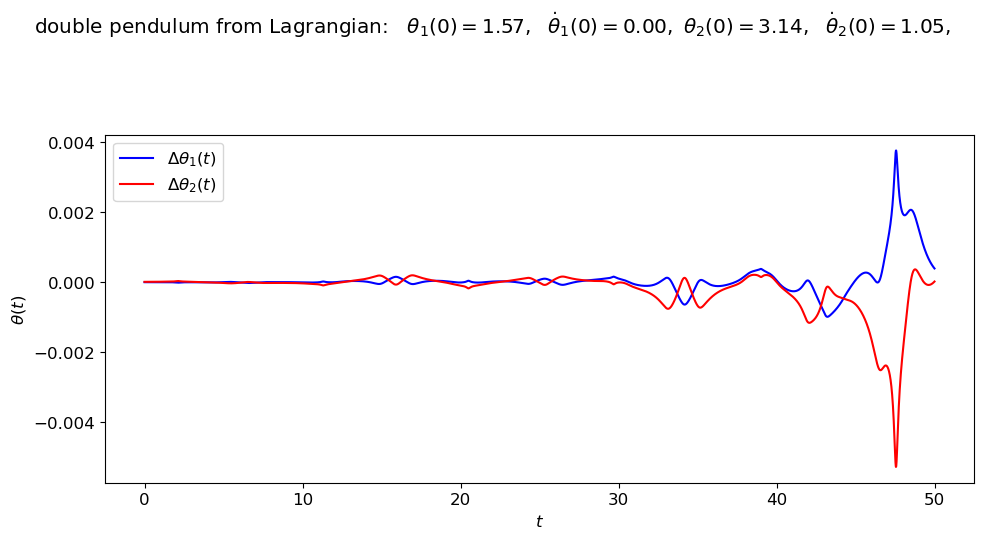

In [12]:
theta1, theta_dot, theta2, theta2_dot = \
    dp1.solve_ode(t_pts,theta1_0,theta1_dot_0,theta2_0,theta2_dot_0)

theta1b, thetab_dot, theta2b, theta2b_dot = \
    dp1.solve_ode(t_pts,theta1_0,theta1_dot_0,theta2_0-0.00001,theta2_dot_0)
#start the plot
fig = plt.figure(figsize=(10,5))
overall_title = 'double pendulum from Lagrangian:  ' + \
                rf' $\theta_1(0) = {theta1_0:.2f},$' + \
                rf'  $\dot\theta_1(0) = {theta1_dot_0:.2f},$' + \
                rf' $\theta_2(0) = {theta2_0:.2f},$' + \
                rf'  $\dot\theta_2(0) = {theta2_dot_0:.2f},$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')

# first plot: phi plot 
ax_a = fig.add_subplot(1,1,1)
start, stop = start_stop_indices(t_pts,t_start,t_end)
plot_y_vs_x(t_pts[start : stop], theta1[start : stop]-theta1b[start : stop], 
            axis_labels=theta_vs_time_labels, 
            color='blue',
            label=r'$\Delta\theta_1(t)$', 
            #title=r'$\theta_1(t)$', 
            ax=ax_a) 
plot_y_vs_x(t_pts[start : stop], theta2[start : stop]-theta2b[start : stop], 
            axis_labels=theta_vs_time_labels, 
            color='red',
            label=r'$\Delta\theta_2(t)$', 
            #title=r'$\theta_2(t)$', 
            ax=ax_a)
fig.tight_layout()
fig.savefig('double_pendulum_Lagrange_2.png', bbox_inches='tight')

Widgt

In [13]:
import ipywidgets as widgets
from ipywidgets import HBox, VBox, Layout, Tab, Label, Checkbox
from ipywidgets import FloatSlider, IntSlider, Play, Dropdown, HTMLMath 
from IPython.display import display

In [14]:
def widge_plot(L1, L2, m1, m2, g):
    # Common plotting time (generate the full time then use slices)
    t_start = 0.
    t_end = 100.
    delta_t = 0.05

    t_pts = np.arange(t_start, t_end + delta_t, delta_t)

    # Instantiate a pendulum 
    dp1 = DoublePendulum(L1=L1,L2=L2,mass1 = mass1,  mass2=mass2, g=g)
    
    
    theta1_0 = np.pi/2.
    theta1_dot_0 = 0.
    theta2_0 = np.pi
    theta2_dot_0 = np.pi / 3.


    theta1, theta_dot, theta2, theta2_dot = dp1.solve_ode(t_pts,theta1_0,theta1_dot_0,theta2_0,theta2_dot_0)
    #small difference terms
    theta1s, theta_dots, theta2s, theta2_dots = dp1.solve_ode(t_pts,theta1_0,theta1_dot_0,theta2_0+0.000001,theta2_dot_0)
    # start the plot!
    fig = plt.figure(figsize=(10,5))
    
    # first plot: phi plot 
    ax_a = fig.add_subplot(1,1,1)                  

    start, stop = start_stop_indices(t_pts, t_start, t_end)    
    ax_a.plot(t_pts[start : stop], theta1[start : stop], color='blue',label=r'$\theta_1(t)$')    
    ax_a.plot(t_pts[start : stop], theta2[start : stop], color='red',label=r'$\theta_2(t)$')    
    ax_a.set_title(r'$\theta(t)$')
    ax_a.set_xlabel('t')
    ax_a.set_ylabel(r'$\theta$')
    ax_a.legend()

    fig.tight_layout()

In [15]:
m1 = FloatSlider(value=1., min=1., max=100., step=1.,
                      description='m1:')
m2 = FloatSlider(value=1., min=1., max=100., step=1.,
                      description='m2:')
L1 = FloatSlider(value=1., min=1., max=100., step=1.,
                      description='L1:')
L2 = FloatSlider(value=1., min=1., max=100., step=1.,
                      description='L2:')
g = FloatSlider(value=1., min=1., max=30., step=0.3,
                      description='g:')

plot_out = widgets.interactive_output(widge_plot, dict(m1=m1, m2=m2, L1=L1, L2=L2, g=g))

In [16]:
UI_box = VBox([m1, m2, L1, L2, g, plot_out])
display(UI_box)

A small change of initial condition leads to completly different delta value. So it is chaotic.

In [17]:
#animation
from matplotlib import animation, rc
from IPython.display import HTML

In [30]:
def xy_coords(x0,y0, theta, L):
    
    x = x0 + L * np.sin(theta)
    y = y0 - L * np.cos(theta)
    return x,y

In [32]:
L1 = 1.
L2 = 1.

In [33]:
dp1 = DoublePendulum(L1=L1,L2=L2,mass1 = mass1,  mass2=mass2, g=g)

In [35]:
dp1.L1

1.0

In [34]:
%%capture
x_min = -3.2
x_max = -x_min
y_min = -3.2
y_max = -y_min


fig_anim = plt.figure(figsize=(5,5), num='double pendulum')
ax_anim = fig_anim.add_subplot(1,1,1)
ax_anim.set_xlim(x_min, x_max)
ax_anim.set_ylim(y_min, y_max)


x0, y0 =0. , 0.
pt0_anim, = ax_anim.plot(x0, y0, 'o', markersize=6, color='black')

x1, y1 = xy_coords(x0, y0, theta1[0], dp1.L1)
pt1_anim, = ax_anim.plot(x1, y1, 'o', markersize=12, color='blue')
ln1_anim, = ax_anim.plot([x0, x1], [y0, y1], color='blue', lw=3)

x2, y2 = xy_coords(x1, y1, theta2[0], dp1.L2)
pt2_anim, = ax_anim.plot(x2, y2, 'o', markersize=12, color='blue')
ln2_anim, = ax_anim.plot([x1, x2], [y1, y2], color='blue', lw=3)

x1_s, y1_s = xy_coords(x0, y0, theta1s[0], dp1.L1)
pt1_anim_s, = ax_anim.plot(x1_s, y1_s, 'o', markersize=12, color='red')
ln1_anim_s, = ax_anim.plot([x0, x1_s], [y0, y1_s], color='red', lw=3)

x2_s, y2_s = xy_coords(x1_s, y1_s, theta2s[0], dp1.L2)
pt2_anim_s, = ax_anim.plot(x2_s, y2_s, 'o', markersize=12, color='red')
ln2_anim_s, = ax_anim.plot([x1_s, x2_s], [y1_s, y2_s], color='red', lw=3)

ax_anim.set_aspect(1)
ax_anim.axis('off')
fig_anim.tight_layout()

NameError: name 'theta1s' is not defined

In [23]:
def animate_wave(i):
    """This is the function called by FuncAnimation to create each frame,
        numbered by i.  So each i corresponds to a point in the t_pts
        array, with index i.
    """
    t = t_pts[i]
    y_pts = u_triangular_1.u_wave_at_t(t)

    line_anim.set_data(x_pts, y_pts)  # overwrite line_anim with new points
    return line_anim   # this is needed for blit=True to work

In [24]:
frame_interval = 80.  # time between frames
frame_number = 201    # number of frames to include (index of t_pts)
anim = animation.FuncAnimation(fig_anim, 
                               animate_wave, 
                               init_func=None,
                               frames=frame_number, 
                               interval=frame_interval, 
                               blit=False,
                               repeat=False)

In [25]:
HTML(anim.to_jshtml()) 

NameError: name 'u_triangular_1' is not defined